In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score,  recall_score, classification_report, confusion_matrix

       Average Wind Speed  Precipitation  Max. Temperature  Min. Temperature  \
count         2556.000000    2556.000000       2556.000000       2556.000000   
mean             7.735070       0.144139         81.053599         60.767214   
std              3.360468       0.554481         13.416024         14.005234   
min              0.000000       0.000000          0.000000          0.000000   
25%              5.370000       0.000000         73.000000         50.000000   
50%              7.160000       0.000000         83.000000         64.000000   
75%              9.840000       0.010000         91.000000         73.000000   
max             22.150000       8.040000        108.000000         81.000000   

       Fastest 2 minute wind speed  Fastest 5 second wind speed  Fog/Ice Fog  \
count                  2556.000000                  2556.000000  2556.000000   
mean                     18.457277                    23.664045     0.481612   
std                       5.350621     

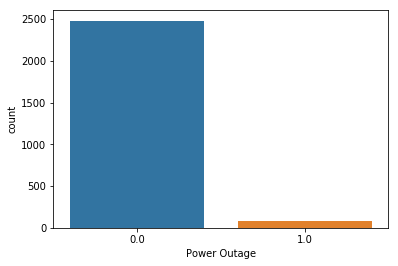

In [71]:
df = pd.read_csv('data.csv');
df = df.fillna(0);
df = df.drop(['DATE'], axis=1);
print(df.describe());
sns.countplot(x="Power Outage", data=df);
plt.show()

In [72]:
#Normalize all the data
from sklearn import preprocessing

scaledData = preprocessing.MinMaxScaler().fit_transform(df.values);
df = pd.DataFrame(scaledData, index = df.index, columns = df.columns);
df.describe()

,Average Wind Speed,Precipitation,Max. Temperature,Min. Temperature,Fastest 2 minute wind speed,Fastest 5 second wind speed,Fog/Ice Fog,Heavy Fog,Thunder,Hail,Glaze/Grime,Smoke/Haze,Power Outage
count,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000,2556.000000
mean,0.349213,0.017928,0.750496,0.750213,0.392708,0.387300,0.481612,0.070814,0.160798,0.000782,0.000391,0.093897,0.029734
std,0.151714,0.068965,0.124222,0.172904,0.113843,0.124538,0.499760,0.256564,0.367417,0.027967,0.019780,0.291742,0.169886
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242438,0.000000,0.675926,0.617284,0.319149,0.310966,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.323251,0.000000,0.768519,0.790123,0.385106,0.376432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444244,0.001244,0.842593,0.901235,0.465957,0.458265,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
#Reduce the number of desired features
df['Avg Wind Speed Squared'] = pd.Series(np.square(df['Average Wind Speed']), index=df.index)
df['5 second wind speed squared'] = pd.Series(np.square(df['Fastest 5 second wind speed']));
df['2 min wind speed squared'] = pd.Series(np.square(df['Fastest 2 minute wind speed']));
df = df[['Power Outage', 'Precipitation', 'Avg Wind Speed Squared','2 min wind speed squared','5 second wind speed squared','Fog/Ice Fog', 'Heavy Fog', 'Thunder','Hail','Glaze/Grime', 'Smoke/Haze']];

In [74]:
#Split into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df['Power Outage'], test_size = 0.33, random_state = 99);
y_test.describe()

count    844.000000
mean       0.024882
std        0.155856
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Power Outage, dtype: float64

In [75]:
#Undersample the number of zeroes
import pandas_ml as pdml
df_ML = pdml.ModelFrame(X_train, target = y_train)
print("Before sampling ratio");
print(df_ML.target.value_counts());
#use ratio = 0.5 to change ratio
sampler = df_ML.imbalance.under_sampling.ClusterCentroids(ratio=0.1);
df_ML = df_ML.fit_sample(sampler);
print("Final counts after undersampling the zeroes");
print(df_ML.target.value_counts());
X_train = df_ML.iloc[:,1:];
y_train = df_ML['Power Outage'];
df_ML.head()

Before sampling ratio
0.0    1657
1.0      55
Name: Power Outage, dtype: int64


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


Final counts after undersampling the zeroes
0.0    550
1.0     55
Name: Power Outage, dtype: int64


,Power Outage,Precipitation,Avg Wind Speed Squared,2 min wind speed squared,5 second wind speed squared,Fog/Ice Fog,Heavy Fog,Thunder,Hail,Glaze/Grime,Smoke/Haze
0,0.0,0.000000,0.013933,0.032870,0.036994,1.000000e+00,0.0,-2.775558e-17,0.0,0.0,-2.775558e-17
1,0.0,0.000373,0.214009,0.179271,0.165088,5.551115e-17,0.0,-2.775558e-17,0.0,0.0,-1.387779e-17
2,0.0,0.286070,0.053849,0.383345,0.364729,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.000000e+00
3,0.0,0.000829,0.080629,0.179271,0.163508,1.000000e+00,0.0,0.000000e+00,0.0,0.0,1.000000e+00
4,0.0,0.000000,0.023305,0.086626,0.079999,1.000000e+00,1.0,0.000000e+00,0.0,0.0,0.000000e+00


In [76]:
#Oversampling the number of ones
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=44, ratio=1);
X_train, y_train = sampler.fit_sample(X_train, y_train);
print(y_train);

[ 0.  0.  0. ...,  1.  1.  1.]


/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [77]:
#Train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score = True, random_state = 123);
rf.fit(X_train, y_train);
print("Done");

Done


In [78]:
#Predict results
pred = rf.predict(X_test);

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred);

print("Accuracy: ", accuracy);

Accuracy:  0.78317535545


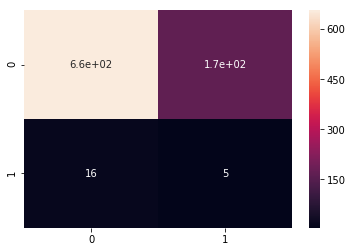

In [79]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot = True)
plt.show()

In [80]:
#Penalized SVM
from sklearn import svm
clf = svm.SVC(kernel='rbf', C=5.0);
clf.fit(X_train, y_train);
pred = clf.predict(X_test);
accuracy = accuracy_score(y_test, pred);
print("f1 score: ", f1_score(y_test, pred, average='macro'));
print(accuracy);

f1 score:  0.18968189705
0.21327014218


In [81]:
arr = list(y_train > 0);
test = [];
for i in arr:
    if (i==False):
        test.append(1);
    else:
        test.append(20);

f1 score:  0.211354958333
Accuracy:  0.245260663507
[ 0.22  0.21  0.26  0.2   0.01  0.01  0.01  0.    0.    0.08]


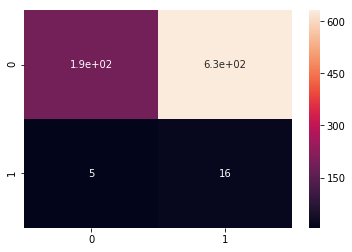

In [82]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
clf = AdaBoostClassifier(n_estimators=100);

clf.fit(X_train, y_train, sample_weight=test);
scores = cross_val_score(clf, X_train, y_train);
pred = clf.predict(X_test);


accuracy = accuracy_score(y_test, pred);
print("f1 score: ", f1_score(y_test, pred, average='macro'))
print("Accuracy: ", accuracy);
print(clf.feature_importances_)
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, pred));

sns.heatmap(cm, annot=True);

plt.show();

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names = ['Normal Days', 'Power Outages']));


               precision    recall  f1-score   support

  Normal Days       0.97      0.23      0.37       823
Power Outages       0.02      0.76      0.05        21

  avg / total       0.95      0.25      0.37       844

